# Auto Insurance fraud claim detection 

 A major general insurance company has a business problem with significant number of claims being reported are fraudulent in nature and it is leading to leakages.  So, the Insurer decided to predict the fraudulent ones before even processing the claims to allocate costs appropriately, to keep the thorough investigation process in place and to design proper action plan for the claims etc.

Insurance fraud refers to any claim with the intent to obtain an improper payment from an insurer.  Motor and health insurance are the two prominent segments that have seen a spurt in fraud. Frauds can be classified from source and/or nature point of view. 

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data PreProcessing

## Claim data

In [2]:
Claim=pd.read_csv(r"TrainData\TrainData\Train_Claim.csv",na_values=('?',"MISSINGVALUE","MISSEDDATA",-5))
Claim.shape

(28836, 19)

## Demographics

In [3]:
Demographics=pd.read_csv(r"TrainData\TrainData\Train_Demographics.csv",na_values=("NA"))
Demographics.shape

(28836, 10)

## Policy Data

In [4]:
Policy=pd.read_csv(r"TrainData\TrainData\Train_Policy.csv",na_values=("-1","NA","MISSINGVAL"))
Policy.shape

(28836, 10)

## Vehicle Data

In [5]:
Vehicle=pd.read_csv(r"TrainData\TrainData\Train_Vehicle.csv",na_values=('???'))
Vehicle.shape

(115344, 3)

In [6]:
Vehicles= pd.DataFrame(set(Vehicle.CustomerID))
Vehicles.columns=["CustomerID"]
for channel in Vehicle.VehicleAttribute.unique():
    temp= Vehicle[Vehicle["VehicleAttribute"] == channel][['CustomerID','VehicleAttributeDetails']]
    temp.columns = ['CustomerID',channel]
    Vehicles=pd.merge(Vehicles,temp)

In [7]:
Vehicles.shape

(28836, 5)

## Target Data

In [8]:
Target=pd.read_csv(r"TrainData\TrainData\Traindata_with_Target.csv")
Target.shape

(28836, 2)

## Merging all DF's into One DF

In [9]:
dfs=[Claim,Policy,Vehicles,Demographics,Target]
Data=pd.DataFrame(set(Vehicle.CustomerID))
Data.columns=["CustomerID"]
for i in dfs:
    Data=pd.merge(Data,i)
Data.shape### Shape of dataframe

(28836, 42)

In [10]:
### Descriptive analysis
Data.describe().T

count           mean           std         min  \
IncidentTime           28805.0      11.764069  6.148869e+00        0.00   
NumberOfVehicles       28836.0       1.823207  9.800987e-01        1.00   
BodilyInjuries         28836.0       0.985782  7.847641e-01        0.00   
Witnesses              28790.0       1.488260  1.040790e+00        0.00   
AmountOfTotalClaim     28786.0   52308.545473  2.510117e+04      150.00   
AmountOfInjuryClaim    28836.0    7337.118428  4.427639e+03        0.00   
AmountOfPropertyClaim  28836.0    7283.870197  4.375843e+03        0.00   
AmountOfVehicleDamage  28836.0   37687.129387  1.797705e+04      109.00   
InsurancePolicyNumber  28836.0  129312.517097  1.111406e+04   110122.00   
CustomerLoyaltyPeriod  28836.0     203.067867  9.993295e+01        1.00   
Policy_Deductible      28836.0    1114.282529  5.466328e+02      500.00   
PolicyAnnualPremium    28695.0    1261.702646  2.053852e+02      436.28   
UmbrellaLimit          28836.0  983668.034436  1.969282e+06 -1000000.00   
InsuredAge             28836.0      38.815370  7.996377e+00       19.00   
InsuredZipCode         28836.0  502436.579068  7.225087e+04   430104.00   
CapitalGains           28836.0   23066.569566  2.763781e+04        0.00   
CapitalLoss            28836.0  -24940.612429  2.791321e+04  -111100.00   

                              25%        50%        75%          max  
IncidentTime                6.000      12.00      17.00        23.00  
NumberOfVehicles            1.000       1.00       3.00         4.00  
BodilyInjuries              0.000       1.00       2.00         2.00  
Witnesses                   1.000       1.00       2.00         3.00  
AmountOfTotalClaim      44643.750   58360.00   68982.75    114920.00  
AmountOfInjuryClaim      4743.750    7147.00   10571.25     21450.00  
AmountOfPropertyClaim    4862.000    7051.00   10327.00     23670.00  
AmountOfVehicleDamage   32193.250   42457.50   49535.75     79560.00  
InsurancePolicyNumber  119698.750  129278.50  138933.25    148619.00  
CustomerLoyaltyPeriod     126.000     199.00     267.00       479.00  
Policy_Deductible         622.000    1000.00    1627.00      2000.00  
PolicyAnnualPremium      1124.425    1266.44    1397.20      2047.59  
UmbrellaLimit               0.000       0.00  485961.00  10000000.00  
InsuredAge                 33.000      38.00      44.00        64.00  
InsuredZipCode         448603.000  466691.00  603848.00    620962.00  
CapitalGains                0.000       0.00   49000.00    100500.00  
CapitalLoss            -50000.000       0.00       0.00         0.00

In [11]:
### Datatypes of dataframe
Data.dtypes

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimi

In [12]:
Data.isna().sum() #check for null values

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsurancePolicyNumber             0
CustomerLoyaltyPeriod             0
DateOfPolicyCoverage              0
InsurancePolicyState              0
Policy_CombinedSingleLimit        0
Policy_Deductible                 0
PolicyAnnualPremium             141
UmbrellaLimit                     0
InsuredRelationship         

In [13]:
cat_attr=Data.select_dtypes(include ='object').columns #sepearating categorical and numerical attributes
num_attr=Data.select_dtypes(include =['int64','float64']).columns #sepearating categorical and numerical attributes

In [14]:
for i in cat_attr: #imputing NULL values
    Data[i]=Data[i].fillna(Data[i].mode()[0])
for i in num_attr:
    Data[i]=Data[i].fillna(Data[i].mean())

In [15]:
Data.isnull().sum()#check for null values

CustomerID                    0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
VehicleID                     0
VehicleModel                  0
VehicleMake                   0
VehicleY

In [16]:
Data.duplicated().sum() #check for duplicates

0

In [17]:
### Info of dataframe
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            28836 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  float64
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              28836 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

# Exploratory Data Analysis

In [18]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Pie chart for spotting number of fraud and non fraud claims 
plt.figure(figsize=[10,10])
fig = px.pie(Data,names='ReportedFraud')
fig.show()

<Figure size 720x720 with 0 Axes>

### looking at count of Fraud claims and non fraud claims so around 27 percent claims are fraud and 73 percent claims are non fraud

In [20]:
### Datasplitting into fraud and not fraud category

Data_f=Data[Data['ReportedFraud']=='Y']
Data_nf=Data[Data['ReportedFraud']=='N']

### Density Plot

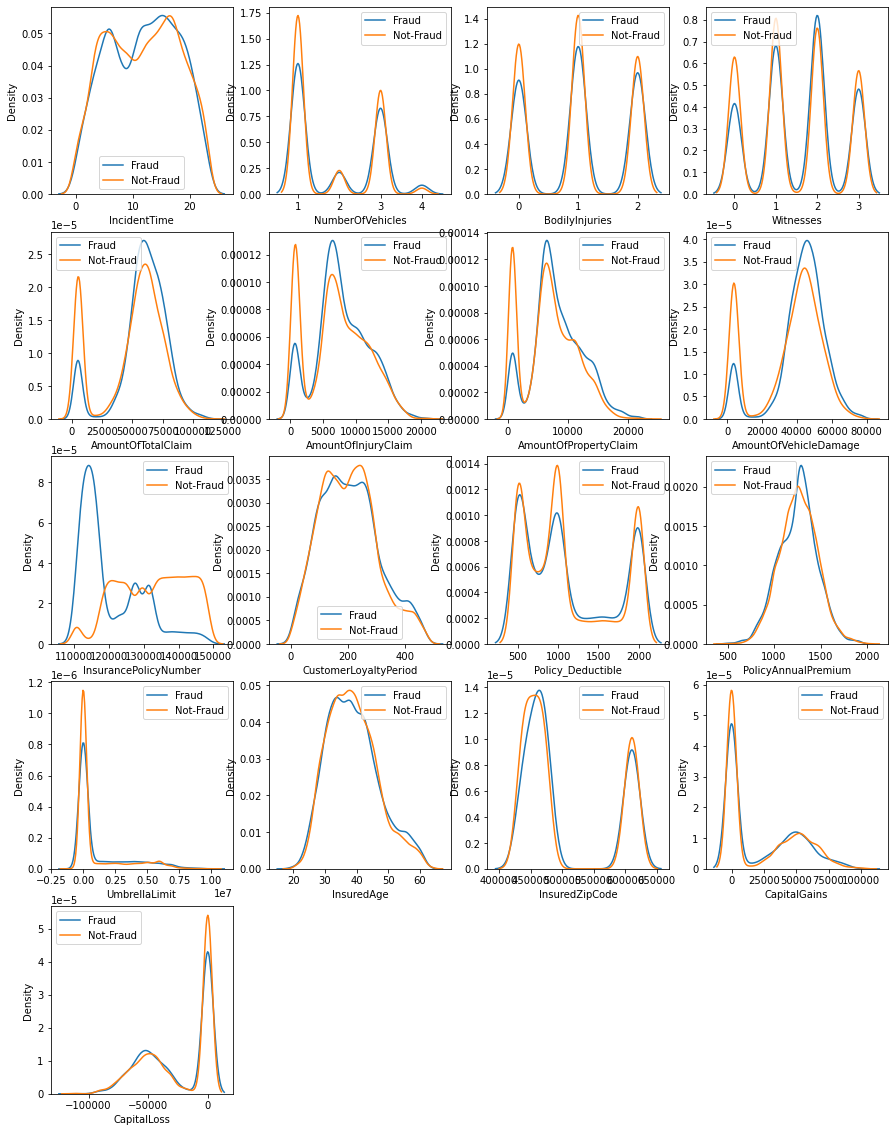

In [21]:
plt.figure(figsize=[15,20])
num_col=Data.describe().columns.to_list()

c=1

for i in num_col:
    plt.subplot(5, 4, c)
    sns.distplot(Data_f[i],hist=False,label='Fraud')
    sns.distplot(Data_nf[i],hist=False,label='Not-Fraud')
    c = c + 1
    plt.legend()    
plt.show()

### Boxplot

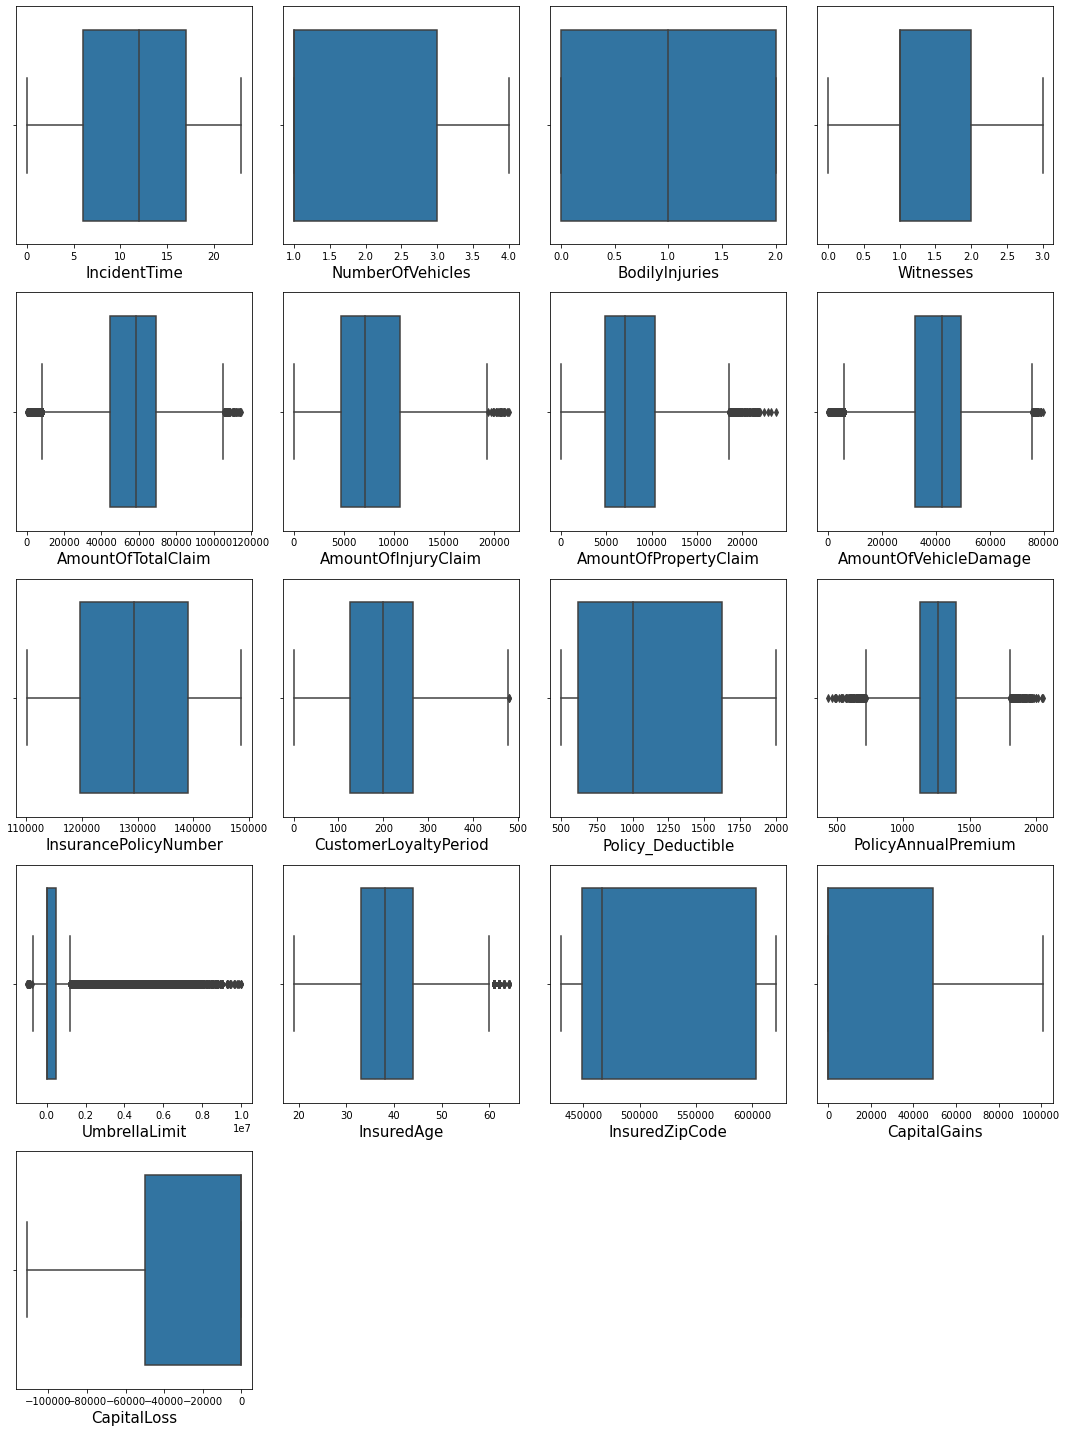

In [22]:
plt.figure(figsize = (15,20))
plotnumber = 1
for col in num_attr:
        ax = plt.subplot(5,4, plotnumber)
        sns.boxplot(Data[col])
        plt.xlabel(col, fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

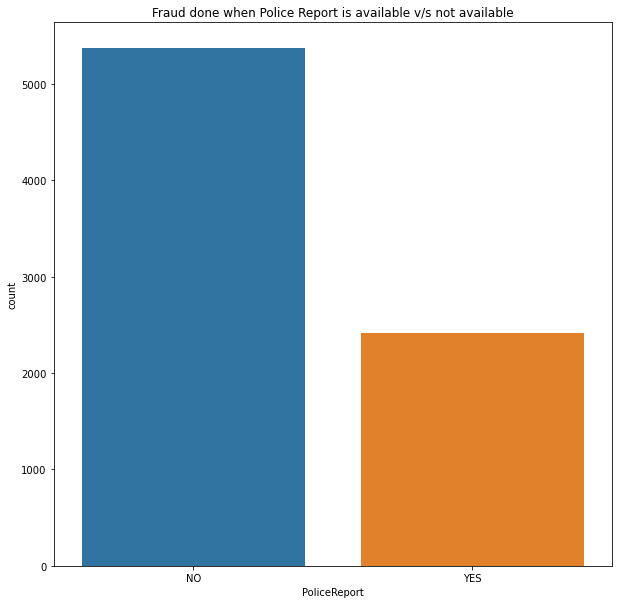

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(Data_f.PoliceReport)
plt.title("Fraud done when Police Report is available v/s not available")
plt.show()

### from above plot it is visible that mostly the fraud claims are done when police report is not avialable

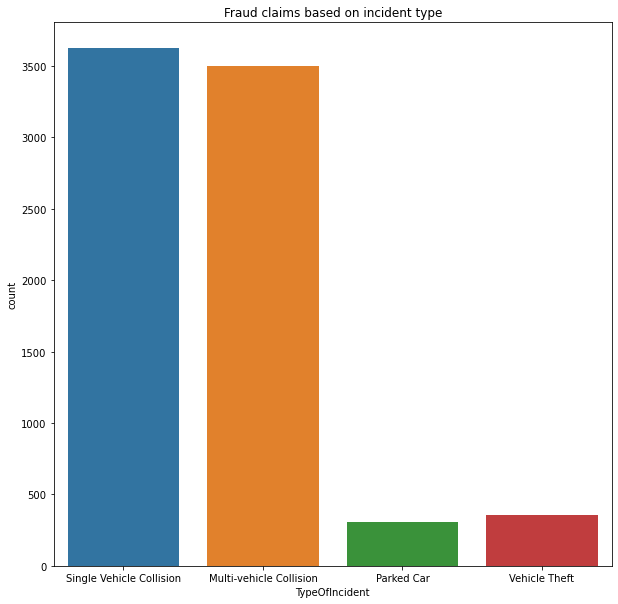

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(Data_f.TypeOfIncident)
plt.title("Fraud claims based on incident type")
plt.show()

### In case of Single vehicle collision and Multiple vehicle collision there are more fraud claims done

In [25]:
Data.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleModel', 'VehicleMake', 'VehicleYOM', 'InsuredAge',
       'InsuredZipCode', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'Country', 'ReportedFraud'],
      dtype='object')

In [26]:
fig = px.pie(Data_f,names='InsuredEducationLevel',title="Fraud claims based on Insured Education Level")
fig.show()

### People with all educational background are doing Fraud

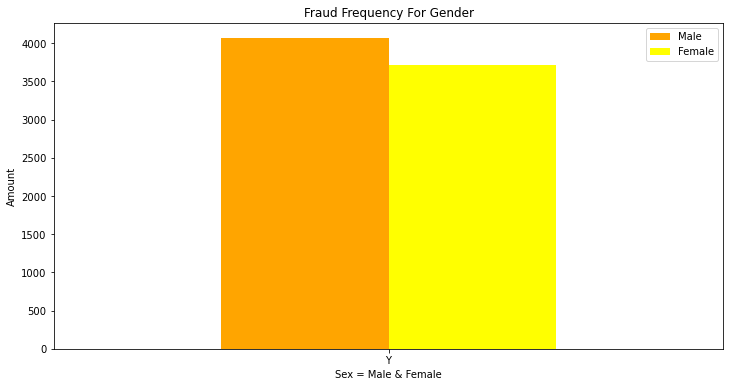

In [27]:
pd.crosstab(Data_f.ReportedFraud, Data.InsuredGender).plot(kind="bar",
                                          color=["orange","yellow"],
                                          figsize=(12,6))

plt.title("Fraud Frequency For Gender")
plt.xlabel("Sex = Male & Female")
plt.ylabel("Amount")
plt.legend(["Male","Female"])
plt.xticks(rotation = 0);

### from above plot Male are more fradulent than female

In [28]:
import datetime as dt

In [29]:
data_v=Data

In [30]:
data_v['DateOfPolicyCoverage'] = pd.to_datetime(data_v['DateOfPolicyCoverage'])
data_v['DateOfIncident']= pd.to_datetime(data_v['DateOfIncident'])

In [31]:
data_v['Difference'] = np.round(((data_v['DateOfIncident'] - data_v['DateOfPolicyCoverage']).dt.days)/365.2425)

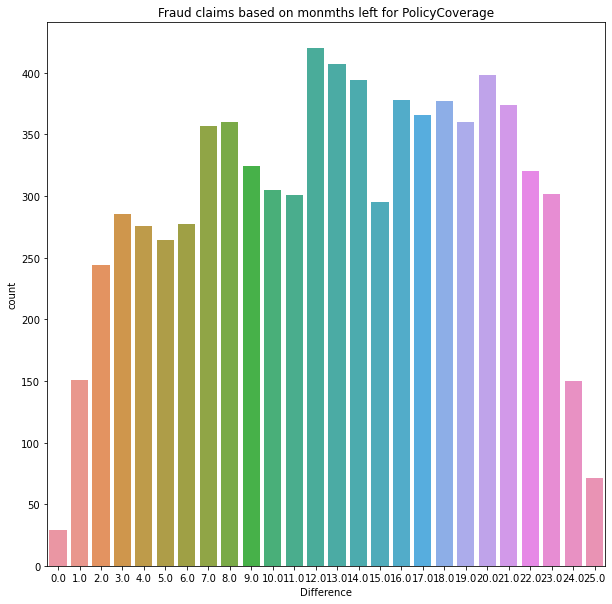

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(data_v[data_v["ReportedFraud"]=="Y"].Difference)
plt.title("Fraud claims based on monmths left for PolicyCoverage")
plt.show()

### from abpve plot it is visible that the people with average time left are more fraudulent

In [33]:
Data.drop("Difference",axis=1,inplace=True)

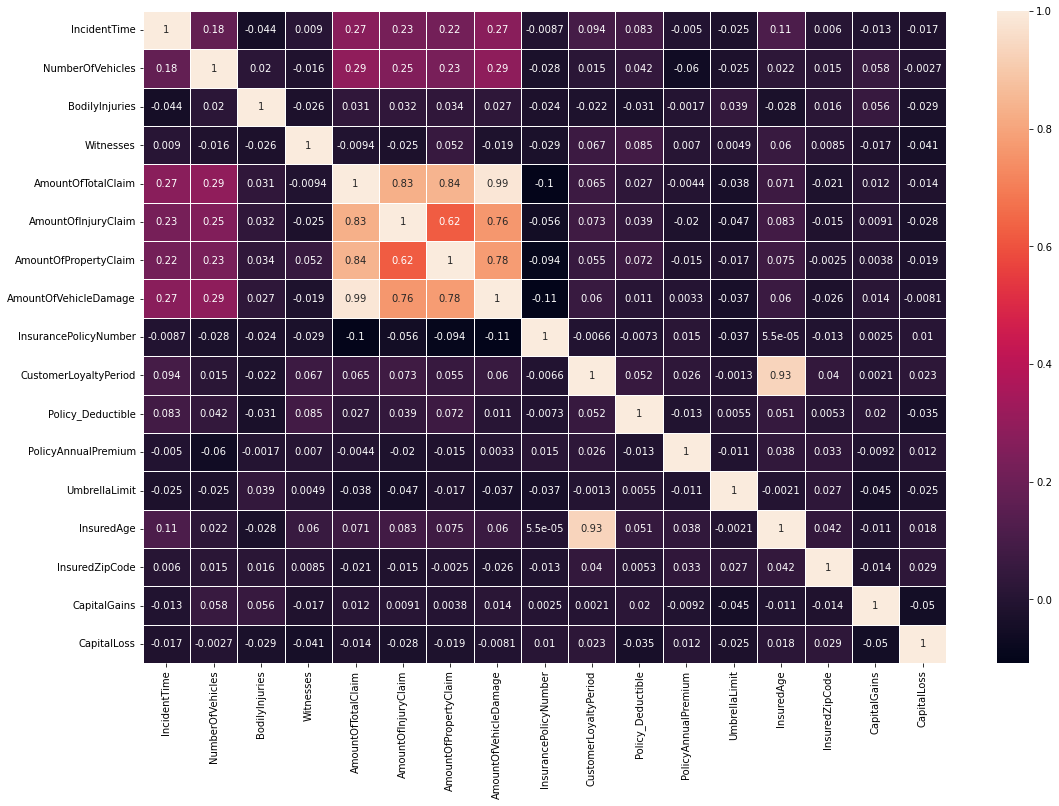

In [34]:
# heatmap

plt.figure(figsize = (18, 12))
sns.heatmap(data =Data.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

## Data Preparation for Model building

In [35]:
#Dropping unique variables
unique_var=['CustomerID', 'DateOfIncident','DateOfPolicyCoverage','IncidentAddress','InsuredZipCode','Country','InsurancePolicyNumber','InsurancePolicyState','VehicleID','Policy_CombinedSingleLimit']

In [36]:
Data_Imp=Data.drop(unique_var,axis=1) 

In [37]:
Data_Imp.columns

Index(['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'InsuredRelationship', 'VehicleModel', 'VehicleMake',
       'VehicleYOM', 'InsuredAge', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'ReportedFraud'],
      dtype='object')

In [38]:
Data_Imp.ReportedFraud=np.where(Data_Imp.ReportedFraud=="Y",1,0) #replacing y with 1 and n with 0

### Splitting X and Y

In [39]:
from sklearn.model_selection import train_test_split #importinf train test split

In [40]:
Data_Imp

TypeOfIncident TypeOfCollission SeverityOfIncident  \
0       Multi-vehicle Collision   Rear Collision       Major Damage   
1      Single Vehicle Collision   Side Collision       Minor Damage   
2       Multi-vehicle Collision   Rear Collision       Minor Damage   
3       Multi-vehicle Collision   Side Collision       Minor Damage   
4                 Vehicle Theft   Rear Collision     Trivial Damage   
...                         ...              ...                ...   
28831  Single Vehicle Collision   Rear Collision         Total Loss   
28832  Single Vehicle Collision   Side Collision         Total Loss   
28833   Multi-vehicle Collision  Front Collision         Total Loss   
28834   Multi-vehicle Collision   Side Collision       Minor Damage   
28835   Multi-vehicle Collision   Rear Collision         Total Loss   

      AuthoritiesContacted IncidentState IncidentCity  IncidentTime  \
0                     Fire        State4        City6          11.0   
1                     Fire        State5        City5          15.0   
2                     Fire        State5        City2           6.0   
3                   Police        State5        City4          12.0   
4                   Police        State9        City5           5.0   
...                    ...           ...          ...           ...   
28831                Other        State5        City5           9.0   
28832                Other        State5        City2          23.0   
28833                 Fire        State9        City4          16.0   
28834               Police        State7        City1          23.0   
28835            Ambulance        State5        City4          20.0   

       NumberOfVehicles PropertyDamage  BodilyInjuries  ...  VehicleMake  \
0                     2             NO               2  ...    Chevrolet   
1                     1             NO               0  ...       Accura   
2                     4             NO               1  ...         Saab   
3                     4             NO               1  ...       Toyota   
4                     1             NO               1  ...       Toyota   
...                 ...            ...             ...  ...          ...   
28831                 1             NO               0  ...       Accura   
28832                 1             NO               0  ...        Dodge   
28833                 3             NO               0  ...       Nissan   
28834                 3             NO               0  ...         Jeep   
28835                 3             NO               2  ...         Saab   

      VehicleYOM  InsuredAge  InsuredGender  InsuredEducationLevel  \
0           1996          32         FEMALE              Associate   
1           2006          23         FEMALE                     JD   
2           2002          32           MALE                College   
3           2006          29           MALE            High School   
4           2004          46         FEMALE              Associate   
...          ...         ...            ...                    ...   
28831       2009          32         FEMALE            High School   
28832       2000          33           MALE              Associate   
28833       1998          39         FEMALE                    PhD   
28834       2006          37           MALE                Masters   
28835       2007          36           MALE                     JD   

       InsuredOccupation  InsuredHobbies  CapitalGains  CapitalLoss  \
0         prof-specialty       paintball             0            0   
1        priv-house-serv            golf             0            0   
2           tech-support     board-games             0       -41100   
3       transport-moving        yachting             0       -59400   
4          other-service        sleeping             0            0   
...                  ...             ...           ...          ...   
28831       adm-clerical        kayaking             0      

In [41]:
Data_Imp.ReportedFraud.value_counts() #looking for value counts

0    21051
1     7785
Name: ReportedFraud, dtype: int64

### Dummification

In [42]:
Data_Imp=pd.get_dummies(Data_Imp,drop_first=True) #dummification

In [43]:
Data_Imp

IncidentTime  NumberOfVehicles  BodilyInjuries  Witnesses  \
0              11.0                 2               2        2.0   
1              15.0                 1               0        0.0   
2               6.0                 4               1        1.0   
3              12.0                 4               1        0.0   
4               5.0                 1               1        2.0   
...             ...               ...             ...        ...   
28831           9.0                 1               0        1.0   
28832          23.0                 1               0        3.0   
28833          16.0                 3               0        2.0   
28834          23.0                 3               0        0.0   
28835          20.0                 3               2        2.0   

       AmountOfTotalClaim  AmountOfInjuryClaim  AmountOfPropertyClaim  \
0                 50541.0                 9122                   4068   
1                 61845.0                11223                   6328   
2                 40285.0                 6552                   6795   
3                 31684.0                 3959                   3466   
4                  2244.0                  488                    244   
...                   ...                  ...                    ...   
28831             74947.0                13627                   9169   
28832             69382.0                 6939                   6939   
28833             64710.0                10359                  10870   
28834             59166.0                12145                   9404   
28835             44370.0                 4554                   4448   

       AmountOfVehicleDamage  CustomerLoyaltyPeriod  Policy_Deductible  ...  \
0                      37351                    136                664  ...   
1                      44294                     16               1000  ...   
2                      26938                      8               1000  ...   
3                      24259                     59                922  ...   
4                       1512                    261                541  ...   
...                      ...                    ...                ...  ...   
28831                  52151                     76                651  ...   
28832                  55504                      1               2000  ...   
28833                  43481                    221               2000  ...   
28834                  37617                    173                656  ...   
28835                  35368                    169               2000  ...   

       InsuredHobbies_hiking  InsuredHobbies_kayaking  InsuredHobbies_movies  \
0                          0                        0                      0   
1                          0                        0                      0   
2                          0                        0                      0   
3                          0                        0                      0   
4                          0                        0                      0   
...                      ...                      ...                    ...   
28831                      0                        1                      0   
28832                      0                        0                      0   
28833                      0                        0                      0   
28834                      0                        0                      0   
28835                      0                        1                      0   

       InsuredHobbies_paintball  InsuredHobbies_polo  InsuredHobbies_reading  \
0                             1                    0                       0   
1                             0                    0                       0   
2                             0                    0                       0   
3                             0                    0                       0   
4  

In [44]:
X = Data_Imp.loc[:,Data_Imp.columns.difference(['ReportedFraud'])] # taking all the independent columns
y = Data_Imp.ReportedFraud # separting the target variable

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #import Logistic regression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.2, random_state=2323)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23068, 156)
(23068,)
(5768, 156)
(5768,)


In [47]:
cat_attr=X_train.select_dtypes(include ='object').columns #seperating categorical and numerical attributes
num_attr=X_train.select_dtypes(include =['int64','float64']).columns  

In [48]:
y_train

25483    0
6800     1
2065     0
13130    0
4560     1
        ..
9484     1
26774    1
8932     0
9839     1
21149    0
Name: ReportedFraud, Length: 23068, dtype: int32

In [49]:
X_train

AmountOfInjuryClaim  AmountOfPropertyClaim  AmountOfTotalClaim  \
25483                 6348                   4647             46471.0   
6800                   615                    615              5154.0   
2065                  2751                   5087             30258.0   
13130                 7583                   9528             60861.0   
4560                  8545                   6261             60916.0   
...                    ...                    ...                 ...   
9484                  5153                   6975             53350.0   
26774                16665                  16665             92391.0   
8932                 17559                  17559            102553.0   
9839                   581                    368              3197.0   
21149                 6965                   9819             68391.0   

       AmountOfVehicleDamage  AuthoritiesContacted_Fire  \
25483                  35476                          0   
6800                    3924                          0   
2065                   22420                          0   
13130                  43750                          0   
4560                   46110                          0   
...                      ...                        ...   
9484                   41222                          1   
26774                  59061                          0   
8932                   67435                          0   
9839                    2248                          0   
21149                  51607                          0   

       AuthoritiesContacted_None  AuthoritiesContacted_Other  \
25483                          0                           1   
6800                           0                           0   
2065                           0                           0   
13130                          0                           1   
4560                           0                           1   
...                          ...                         ...   
9484                           0                           0   
26774                          0                           0   
8932                           0                           0   
9839                           1                           0   
21149                          0                           0   

       AuthoritiesContacted_Police  BodilyInjuries  CapitalGains  ...  \
25483                            0               1         61900  ...   
6800                             1               1         37600  ...   
2065                             1               0             0  ...   
13130                            0               0             0  ...   
4560                             0               0         37800  ...   
...                            ...             ...           ...  ...   
9484                             0               1             0  ...   
26774                            1               2         51100  ...   
8932                             1               2         51100  ...   
9839                             0               0         37600  ...   
21149                            1               1             0  ...   

       VehicleYOM_2007  VehicleYOM_2008  VehicleYOM_2009  VehicleYOM_2010  \
25483                0                0                0                0   
6800                 0                0                0                0   
2065                 1                0                0                0   
13130                0                1                0                0   
4560                 0                0                0                0   
...                ...              ...              ...              ...   
9484                 0                1                0                0   
26774                0                0                1                0   
8932                 0                0                0                0   
9839 

In [50]:
X_test

AmountOfInjuryClaim  AmountOfPropertyClaim  AmountOfTotalClaim  \
26275                  715                    715              7426.0   
20497                12096                   6048             61132.0   
2697                 12529                   6652             71623.0   
20581                13645                   6823             68226.0   
9884                  7157                   6049             56659.0   
...                    ...                    ...                 ...   
15470                 7355                  12637             72613.0   
758                   7589                   7589             56549.0   
9643                 13667                   9290             73247.0   
6046                  5393                   8862             52003.0   
5611                 11741                    878             58705.0   

       AmountOfVehicleDamage  AuthoritiesContacted_Fire  \
26275                   5996                          0   
20497                  42988                          1   
2697                   52442                          0   
20581                  47758                          1   
9884                   43453                          1   
...                      ...                        ...   
15470                  52621                          0   
758                    41371                          0   
9643                   50290                          1   
6046                   37748                          1   
5611                   46086                          0   

       AuthoritiesContacted_None  AuthoritiesContacted_Other  \
26275                          0                           0   
20497                          0                           0   
2697                           0                           1   
20581                          0                           0   
9884                           0                           0   
...                          ...                         ...   
15470                          0                           1   
758                            0                           0   
9643                           0                           0   
6046                           0                           0   
5611                           0                           0   

       AuthoritiesContacted_Police  BodilyInjuries  CapitalGains  ...  \
26275                            1               1             0  ...   
20497                            0               1             0  ...   
2697                             0               1             0  ...   
20581                            0               1             0  ...   
9884                             0               0             0  ...   
...                            ...             ...           ...  ...   
15470                            0               2         37700  ...   
758                              0               0         55700  ...   
9643                             0               0             0  ...   
6046                             0               1             0  ...   
5611                             0               0         54700  ...   

       VehicleYOM_2007  VehicleYOM_2008  VehicleYOM_2009  VehicleYOM_2010  \
26275                0                0                0                0   
20497                0                0                0                0   
2697                 0                0                1                0   
20581                0                0                0                0   
9884                 0                0                0                0   
...                ...              ...              ...              ...   
15470                0                0                0                0   
758                  0                0                0                0   
9643                 0                0                0                0   
6046 

#### Logistic Model

In [51]:
from sklearn.linear_model import LogisticRegression #importing logistic model

In [52]:
lr_model = LogisticRegression().fit(X_train,y_train) #build models

In [53]:
y_train_Pred = lr_model.predict(X_train)#predictions on train and test data
y_test_Pred = lr_model.predict(X_test)  

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}")#confusion matrix of train dfs

========Train=======
Confusion Matrix 
[[16769    71]
 [ 6160    68]]


In [56]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}") #confusion matrix of testdfs

========Test=======
Confusion Matrix 
[[4203    8]
 [1540   17]]


In [57]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [58]:
from sklearn import metrics
import numpy as np
Metrics = pd.DataFrame(columns=['Model','F1_Train','F1_Test'])
#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,Metrics):
    F1_Train = metrics.f1_score(train_act,train_pred,average="weighted")
    F1_Test = metrics.f1_score(test_act,test_pred,average="weighted")
    s1=pd.Series([model_description,F1_Train,F1_Test],
                                           index=Metrics.columns)
    Metrics=Metrics.append(s1, ignore_index=True)
    return(Metrics)

In [59]:
Metrics=get_metrics(y_train,lr_model.predict(X_train),y_test,lr_model.predict(X_test),"Logistic",Metrics)
Metrics#update metrics df

Model  F1_Train   F1_Test
0  Logistic  0.621404  0.622328

In [60]:
# !pip install mlxtend

In [61]:
from mlxtend.plotting import plot_learning_curves #import leqrning curves

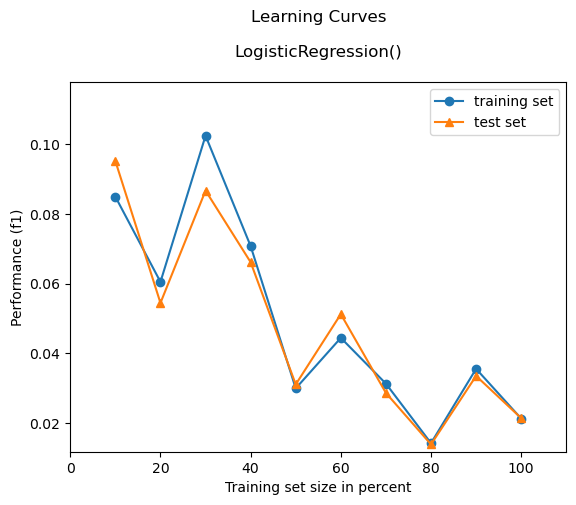

In [62]:
plot_learning_curves(X_train, y_train, X_test, y_test,lr_model,scoring="f1")
plt.show()#plottng learning curves

### Removing Influential points

In [63]:
Data_Imp

IncidentTime  NumberOfVehicles  BodilyInjuries  Witnesses  \
0              11.0                 2               2        2.0   
1              15.0                 1               0        0.0   
2               6.0                 4               1        1.0   
3              12.0                 4               1        0.0   
4               5.0                 1               1        2.0   
...             ...               ...             ...        ...   
28831           9.0                 1               0        1.0   
28832          23.0                 1               0        3.0   
28833          16.0                 3               0        2.0   
28834          23.0                 3               0        0.0   
28835          20.0                 3               2        2.0   

       AmountOfTotalClaim  AmountOfInjuryClaim  AmountOfPropertyClaim  \
0                 50541.0                 9122                   4068   
1                 61845.0                11223                   6328   
2                 40285.0                 6552                   6795   
3                 31684.0                 3959                   3466   
4                  2244.0                  488                    244   
...                   ...                  ...                    ...   
28831             74947.0                13627                   9169   
28832             69382.0                 6939                   6939   
28833             64710.0                10359                  10870   
28834             59166.0                12145                   9404   
28835             44370.0                 4554                   4448   

       AmountOfVehicleDamage  CustomerLoyaltyPeriod  Policy_Deductible  ...  \
0                      37351                    136                664  ...   
1                      44294                     16               1000  ...   
2                      26938                      8               1000  ...   
3                      24259                     59                922  ...   
4                       1512                    261                541  ...   
...                      ...                    ...                ...  ...   
28831                  52151                     76                651  ...   
28832                  55504                      1               2000  ...   
28833                  43481                    221               2000  ...   
28834                  37617                    173                656  ...   
28835                  35368                    169               2000  ...   

       InsuredHobbies_hiking  InsuredHobbies_kayaking  InsuredHobbies_movies  \
0                          0                        0                      0   
1                          0                        0                      0   
2                          0                        0                      0   
3                          0                        0                      0   
4                          0                        0                      0   
...                      ...                      ...                    ...   
28831                      0                        1                      0   
28832                      0                        0                      0   
28833                      0                        0                      0   
28834                      0                        0                      0   
28835                      0                        1                      0   

       InsuredHobbies_paintball  InsuredHobbies_polo  InsuredHobbies_reading  \
0                             1                    0                       0   
1                             0                    0                       0   
2                             0                    0                       0   
3                             0                    0                       0   
4  

In [64]:
cat_attr=Data_Imp.select_dtypes(include ='object').columns 
num_attr=Data_Imp.select_dtypes(include =['int64','float64']).columns 

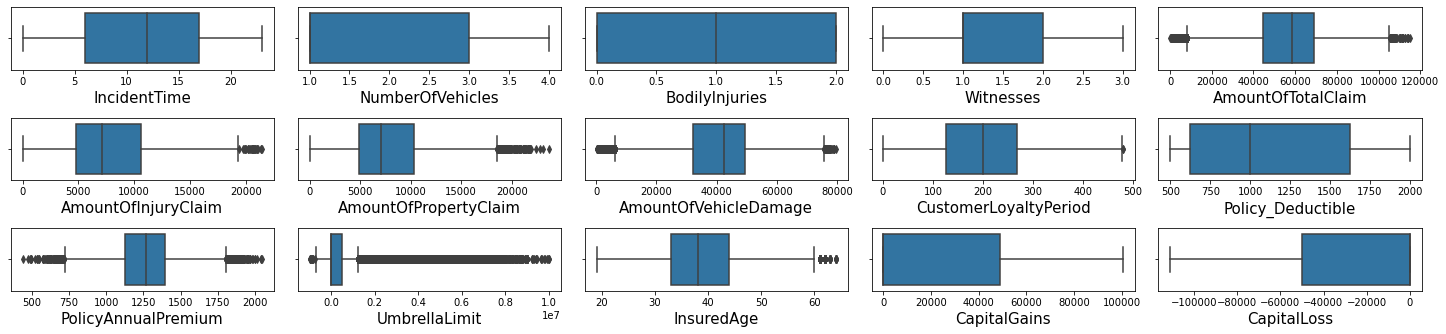

In [65]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in num_attr:
        ax = plt.subplot(10,5, plotnumber)
        sns.boxplot(Data_Imp[col])
        plt.xlabel(col, fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

In [66]:
Q1,Q3 = np.percentile(Data_Imp["AmountOfTotalClaim"], [25,75])

In [67]:
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

In [68]:
Data_wo = Data_Imp[(Data_Imp["AmountOfTotalClaim"]>ll)&(Data_Imp["AmountOfTotalClaim"]<ul)] #dropping outliers

In [69]:
X_wo = Data_wo.loc[:,Data_wo.columns.difference(['ReportedFraud'])] # taking all the independent columns
y_wo = Data_wo.ReportedFraud # separting the target variable

In [70]:
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X_wo, y_wo, stratify= y_wo, test_size = 0.2, random_state=2323)

print(X_train_wo.shape)
print(y_train_wo.shape)
print(X_test_wo.shape)
print(y_test_wo.shape)

(19095, 156)
(19095,)
(4774, 156)
(4774,)


In [71]:
y_train_wo.value_counts()#looking at valuecounts

0    13381
1     5714
Name: ReportedFraud, dtype: int64

In [72]:
cat_attr=X_train_wo.select_dtypes(include ='object').columns #seperating categorucal and numerical attributes
num_attr=X_train_wo.select_dtypes(include =['int64','float64']).columns 

In [74]:
wo_model = LogisticRegression().fit(X_train_wo,y_train_wo) #buidlimg model

y_train_Pred_wo = wo_model.predict(X_train_wo)
y_test_Pred_wo = wo_model.predict(X_test_wo)#predictions on train and test data

In [75]:
print('========Train=======')#confusion matrix of train dfs
print(f"Confusion Matrix \n{confusion_matrix(y_train_wo, y_train_Pred_wo)}")

========Train=======
Confusion Matrix 
[[13379     2]
 [ 5711     3]]


In [76]:
print('========Test=======')#confusion matrix of test dfs
print(f"Confusion Matrix \n{confusion_matrix(y_test_wo, y_test_Pred_wo)}")

========Test=======
Confusion Matrix 
[[3344    2]
 [1427    1]]


In [77]:
Metrics=get_metrics(y_train_wo,y_train_Pred_wo,y_test_wo,y_test_Pred_wo,"Logistic_wo",Metrics)#update metrics df
Metrics

Model  F1_Train   F1_Test
0     Logistic  0.621404  0.622328
1  Logistic_wo  0.577781  0.577908

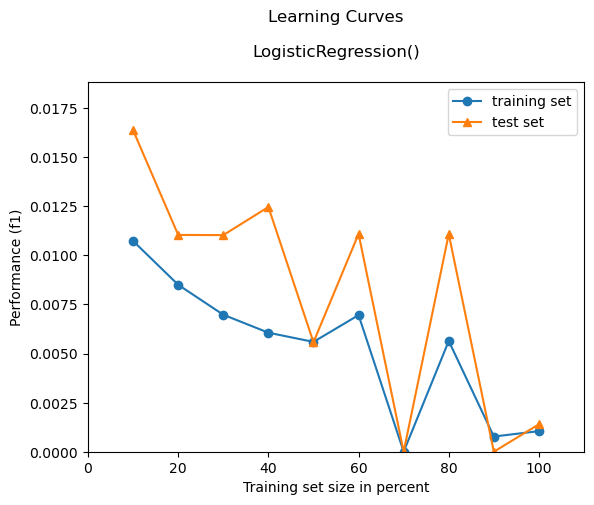

In [78]:
plot_learning_curves(X_train_wo, y_train_wo, X_test_wo, y_test_wo,wo_model,scoring="f1")
plt.show()#plotting learning curve

### After scaling with outliers

In [79]:
X_train=X_train.drop('VehicleModel_RSX',axis=1)
X_test=X_test.drop('VehicleModel_RSX',axis=1)

In [80]:
cat_attr=X_train.select_dtypes(include ='object').columns #seperating numerical and categorical attributes
num_attr=X_train.select_dtypes(include =['int64','float64']).columns 

In [81]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [82]:
scaler = StandardScaler()#Scaling
X_train[num_attr] = scaler.fit_transform(X_train[num_attr])
X_test[num_attr] = scaler.transform(X_test[num_attr])

In [83]:
scaled_model = LogisticRegression().fit(X_train,y_train)#building model

In [84]:
y_train_Pred = scaled_model .predict(X_train)#getting predictions
y_test_Pred = scaled_model .predict(X_test)

In [85]:
print('========Train=======')#confusion matrix of train dfs
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}")

========Train=======
Confusion Matrix 
[[15575  1265]
 [ 2313  3915]]


In [86]:
print('========Test=======')#confusion matrix of test dfs
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}")

========Test=======
Confusion Matrix 
[[3912  299]
 [ 541 1016]]


In [87]:
Metrics=get_metrics(y_train,scaled_model.predict(X_train),y_test,scaled_model.predict(X_test),"Scaled",Metrics)
Metrics#updating metrics

Model  F1_Train   F1_Test
0     Logistic  0.621404  0.622328
1  Logistic_wo  0.577781  0.577908
2       Scaled  0.840109  0.850267

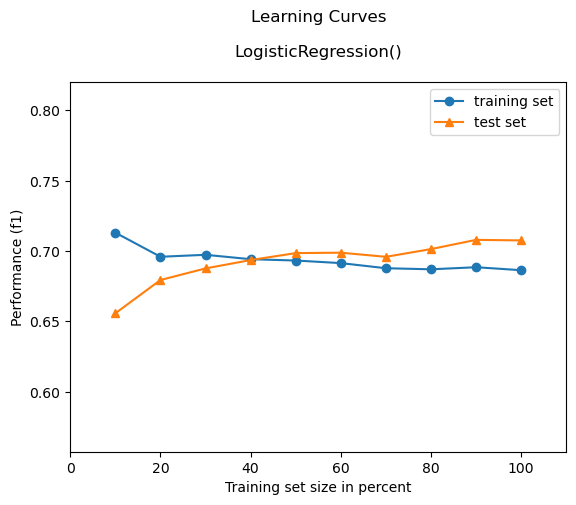

In [88]:
plot_learning_curves(X_train, y_train, X_test, y_test,scaled_model,scoring="f1")#plotting learning curves
plt.show()

### VIF

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #import VIF

In [90]:
vif_data = pd.DataFrame()
vif_data["feature"] = num_attr

In [91]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Data_Imp[num_attr].values, i)
                          for i in range(len(Data_Imp[num_attr].columns))]

In [92]:
print(vif_data) #print VIF data

                  feature          VIF
0     AmountOfInjuryClaim    75.561102
1   AmountOfPropertyClaim    75.139478
2      AmountOfTotalClaim  3043.481724
3   AmountOfVehicleDamage  1589.897046
4          BodilyInjuries     2.566101
5            CapitalGains     1.706948
6             CapitalLoss     1.808065
7   CustomerLoyaltyPeriod    24.582408
8            IncidentTime     5.194311
9              InsuredAge    92.770969
10       NumberOfVehicles     4.898467
11    PolicyAnnualPremium    28.210501
12      Policy_Deductible     5.163069
13          UmbrellaLimit     1.255076
14              Witnesses     3.082091


In [93]:
vif_data.sort_values(by='VIF',ascending=False) #sort VIF data

feature          VIF
2      AmountOfTotalClaim  3043.481724
3   AmountOfVehicleDamage  1589.897046
9              InsuredAge    92.770969
0     AmountOfInjuryClaim    75.561102
1   AmountOfPropertyClaim    75.139478
11    PolicyAnnualPremium    28.210501
7   CustomerLoyaltyPeriod    24.582408
8            IncidentTime     5.194311
12      Policy_Deductible     5.163069
10       NumberOfVehicles     4.898467
14              Witnesses     3.082091
4          BodilyInjuries     2.566101
6             CapitalLoss     1.808065
5            CapitalGains     1.706948
13          UmbrellaLimit     1.255076

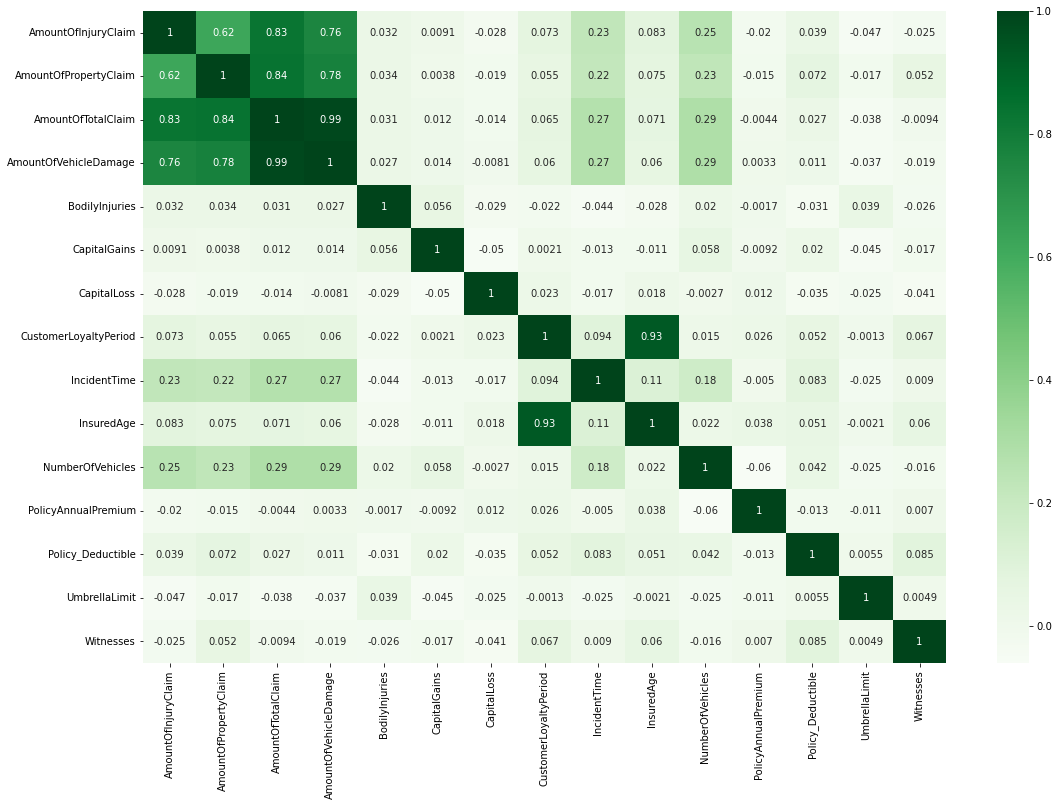

In [94]:
plt.figure(figsize = (18, 12))
sns.heatmap(data =Data_Imp[num_attr].corr(), annot = True,cmap="Greens")
plt.show()
#plot correlation plot

In [95]:
vif_cols=list(vif_data.loc[vif_data["VIF"]>=6,"feature"]) #removing columns with higher VIF

In [96]:
vif_cols

['AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfTotalClaim',
 'AmountOfVehicleDamage',
 'CustomerLoyaltyPeriod',
 'InsuredAge',
 'PolicyAnnualPremium']

In [97]:
y_train

25483    0
6800     1
2065     0
13130    0
4560     1
        ..
9484     1
26774    1
8932     0
9839     1
21149    0
Name: ReportedFraud, Length: 23068, dtype: int32

In [98]:
Data_VIF=Data_Imp.drop(vif_cols,axis=1) # drop highly correlated attributes

In [99]:
cat_attr=Data_VIF.select_dtypes(include ='object').columns  #seperating categorical and numerical attributes
num_attr=Data_VIF.select_dtypes(include =['int64','float64']).columns 

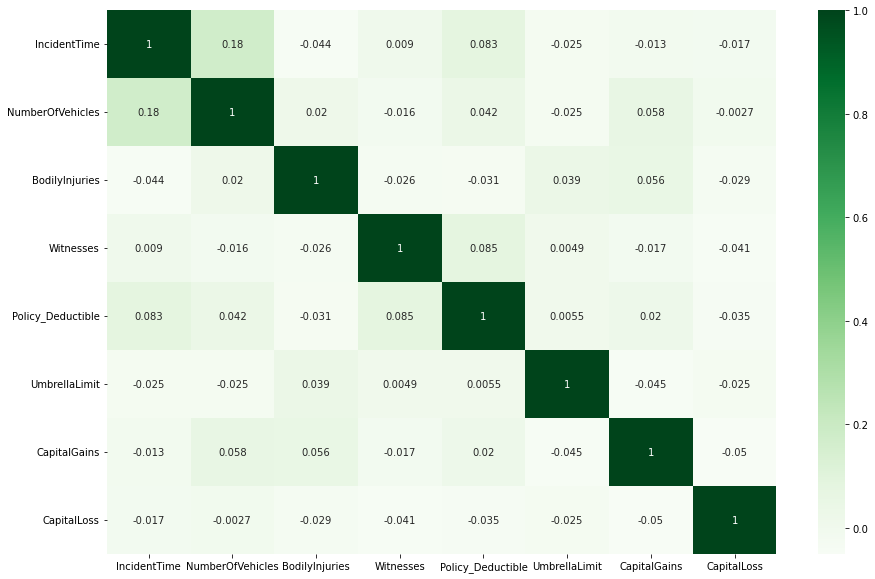

In [100]:
plt.figure(figsize = (15,10))
sns.heatmap(data =Data_VIF[num_attr].corr(), annot = True,cmap="Greens")
plt.show()
#plot correlation plot

In [101]:
X_VIF = Data_VIF.drop(['ReportedFraud'],axis=1)#splitting X and Y
y_VIF = Data_VIF['ReportedFraud']

In [102]:
# ** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**
## Spilit the data into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_VIF, y_VIF,stratify=y_VIF, test_size=0.2, random_state=101)

In [103]:
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 23068
X Train Size: 23068
X Test  Size: 5768
Y Target Size: 5768


In [104]:
scaler = MinMaxScaler() #scaling 
X_train[num_attr] = scaler.fit_transform(X_train[num_attr])
X_test[num_attr] = scaler.transform(X_test[num_attr])

In [105]:
y_train.shape#getting shape of Ytrain

(23068,)

In [106]:
X_train=X_train.drop('VehicleModel_RSX',axis=1)
X_test=X_test.drop('VehicleModel_RSX',axis=1)

In [107]:
logistic_reg_VIF= LogisticRegression().fit(X_train,y_train) #Training Model

In [108]:
print('========Train=======')#confusion matrix of train dfs
print(f"Confusion Matrix \n{confusion_matrix(y_train,logistic_reg_VIF.predict(X_train))}")

========Train=======
Confusion Matrix 
[[15577  1263]
 [ 2300  3928]]


In [109]:
print('========Test=======')#confusion matrix pof test dfs
print(f"Confusion Matrix \n{confusion_matrix(y_test,logistic_reg_VIF.predict(X_test))}")

========Test=======
Confusion Matrix 
[[3872  339]
 [ 574  983]]


In [110]:
Metrics=get_metrics(y_train,logistic_reg_VIF.predict(X_train),y_test,logistic_reg_VIF.predict(X_test),"Logistic_VIF",Metrics)
Metrics#updating metrics

Model  F1_Train   F1_Test
0      Logistic  0.621404  0.622328
1   Logistic_wo  0.577781  0.577908
2        Scaled  0.840109  0.850267
3  Logistic_VIF  0.840837  0.837401

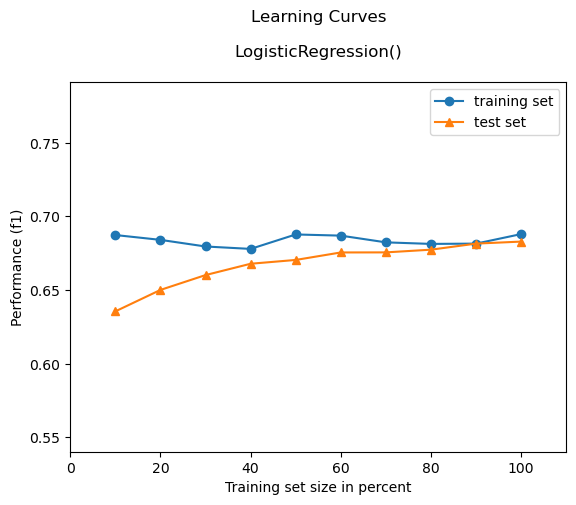

In [111]:
plot_learning_curves(X_train, y_train, X_test, y_test,logistic_reg_VIF,scoring="f1")#plotting learning curves
plt.show()

### Regularization Models

In [112]:
Regularization=["l1","l2","elasticnet"]


*********l1********

========Train=======
Confusion Matrix 
[[15564  1276]
 [ 2290  3938]]
========Test=======
Confusion Matrix 
[[3872  339]
 [ 570  987]]

*********l2********

========Train=======
Confusion Matrix 
[[15578  1262]
 [ 2300  3928]]
========Test=======
Confusion Matrix 
[[3872  339]
 [ 574  983]]

*********elasticnet********

========Train=======
Confusion Matrix 
[[15577  1263]
 [ 2301  3927]]
========Test=======
Confusion Matrix 
[[3871  340]
 [ 573  984]]


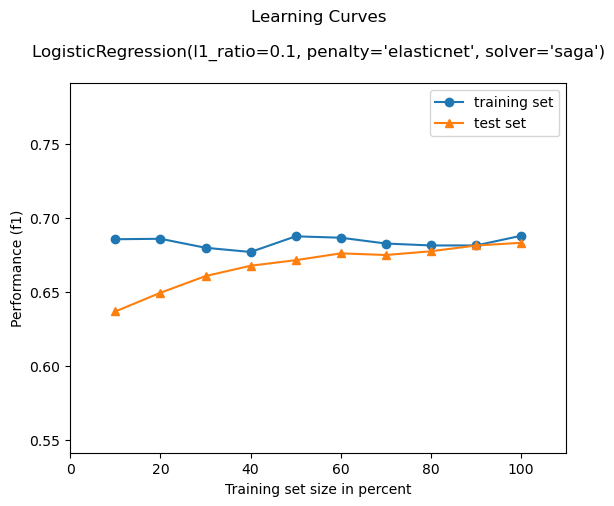

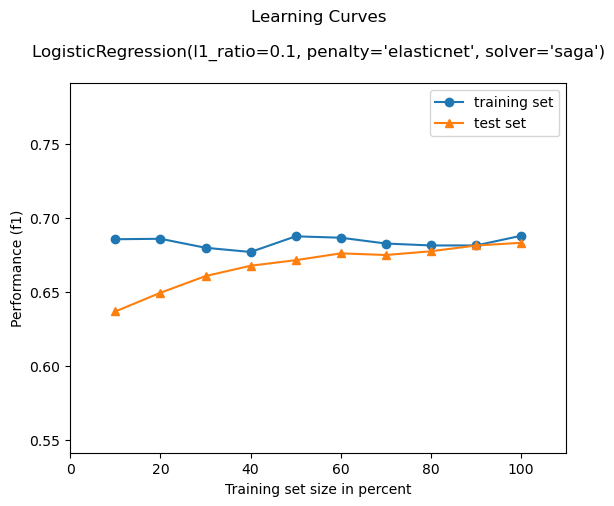

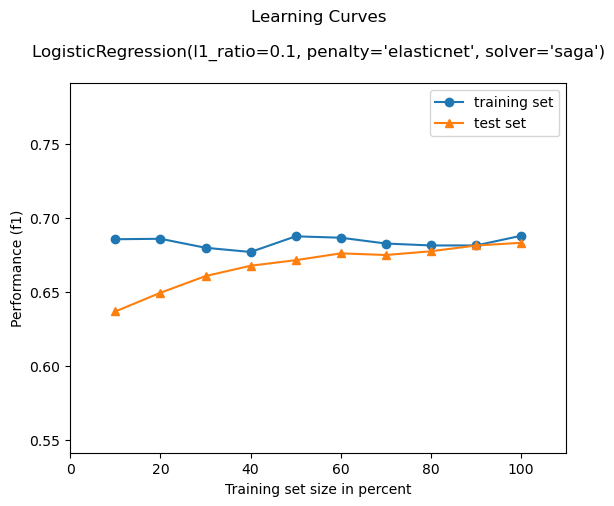

In [113]:
for i in Regularization: #building all regularization models together
    model=LogisticRegression(penalty=i,solver='saga',l1_ratio=0.1).fit(X_train,y_train)
    y_train_Pred = model.predict(X_train)
    y_test_Pred = model.predict(X_test)
    if(i=="l1"):
        Lasso=model
    elif(i=="l2"):
        Ridge=model
    else:
        ElasticNet=model
    print(f"\n*********{i}********\n")
    print(f'========Train=======')
    print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}")
    print(f'========Test=======')
    print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}")
    Metrics=get_metrics(y_train,y_train_Pred,y_test,y_test_Pred ,f"{i}",Metrics)
    
for i in Regularization:    
    plot_learning_curves(X_train, y_train, X_test, y_test,model,scoring="f1")
    plt.show()
    plotnumber+=1


In [114]:
Metrics #updating metrics

Model  F1_Train   F1_Test
0      Logistic  0.621404  0.622328
1   Logistic_wo  0.577781  0.577908
2        Scaled  0.840109  0.850267
3  Logistic_VIF  0.840837  0.837401
4            l1  0.840823  0.838196
5            l2  0.840877  0.837401
6    elasticnet  0.840787  0.837443

### Naive Bayes Classifier

In [115]:
from sklearn.naive_bayes import GaussianNB #importing NaiveBayes

In [116]:
NBmodel = GaussianNB().fit(X_train,y_train) 
nb_pred_train = NBmodel.predict(X_train)  
nb_pred_test = NBmodel.predict(X_test) #predict on test data 

In [117]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, nb_pred_train)}")#confusion matrix of train dfs

========Train=======
Confusion Matrix 
[[11834  5006]
 [ 1929  4299]]


In [118]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, nb_pred_test)}")#confusion matrix of test dfs

========Test=======
Confusion Matrix 
[[2916 1295]
 [ 495 1062]]


In [119]:
Metrics=get_metrics(y_train,nb_pred_train,y_test,nb_pred_test,"Naive Bayes",Metrics)#updating metrics
Metrics

Model  F1_Train   F1_Test
0      Logistic  0.621404  0.622328
1   Logistic_wo  0.577781  0.577908
2        Scaled  0.840109  0.850267
3  Logistic_VIF  0.840837  0.837401
4            l1  0.840823  0.838196
5            l2  0.840877  0.837401
6    elasticnet  0.840787  0.837443
7   Naive Bayes   0.71403  0.705096

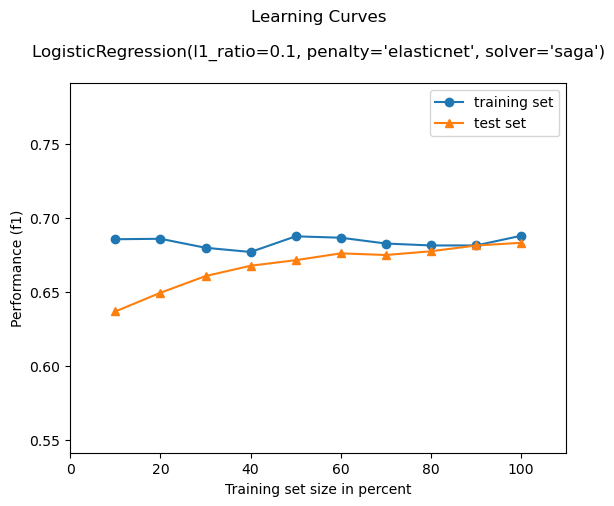

In [120]:
plot_learning_curves(X_train, y_train, X_test, y_test,model,scoring="f1")#plotting learning curves
plt.show()

### KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
scores=[]  #choosing K in KNN
print("Loading", end=" ")
for i in range(1,10) :
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_train)
    scores.append(f1_score(y_train,pred,average="weighted"))
    print("#", end=" ")
scores

Loading # # # # # # # # # 

[0.9999566510010417,
 0.9411258045639198,
 0.9440043241585095,
 0.9382357790380876,
 0.9402180678389076,
 0.9377461643754659,
 0.9397105434153104,
 0.9378502463003713,
 0.9389232219648794]

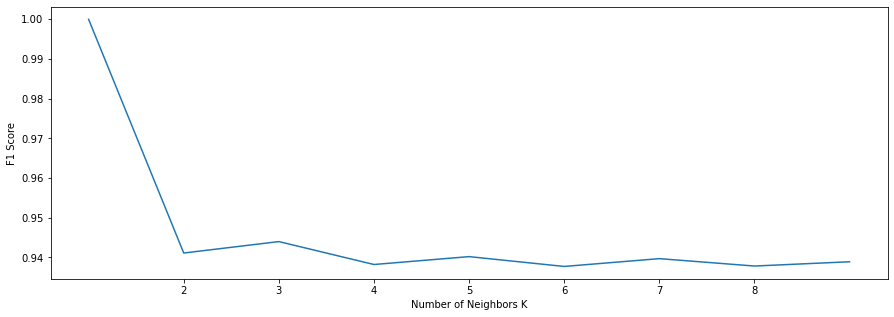

In [123]:
# plot F1score vs k
plt.figure(figsize=(15,5))
plt.plot(range(1,10), scores)

plt.xticks(np.arange(2,9, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('F1 Score')
plt.show()

##### with 3 as optimal nearest neighbour

In [124]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)#building model
y_train_Pred = knn.predict(X_train)#getting predictions
y_test_Pred = knn.predict(X_test)

In [125]:
print('========Train=======') #confusion matrix of train dfs
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}")

========Train=======
Confusion Matrix 
[[16514   326]
 [  944  5284]]


In [126]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}") #confusion matrix of test dfs

========Test=======
Confusion Matrix 
[[4080  131]
 [ 267 1290]]


In [127]:
Metrics = get_metrics(y_train,y_train_Pred,y_test,y_test_Pred,"KNN",Metrics)#updating metrics
Metrics

Model  F1_Train   F1_Test
0      Logistic  0.621404  0.622328
1   Logistic_wo  0.577781  0.577908
2        Scaled  0.840109  0.850267
3  Logistic_VIF  0.840837  0.837401
4            l1  0.840823  0.838196
5            l2  0.840877  0.837401
6    elasticnet  0.840787  0.837443
7   Naive Bayes   0.71403  0.705096
8           KNN  0.944004  0.929971

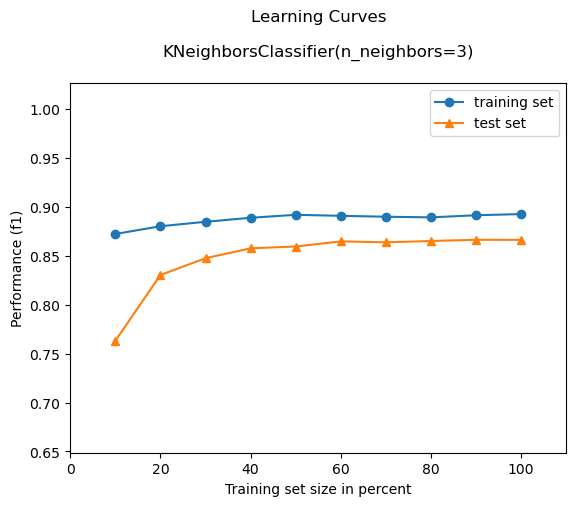

In [128]:
plot_learning_curves(X_train, y_train, X_test, y_test,knn,scoring="f1")#Plotting Learning curves
plt.show()

### Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier #import DecisionTrees

In [130]:
DT=DecisionTreeClassifier().fit(X_train,y_train)#building model
y_train_Pred = DT.predict(X_train)#getting predictions
y_test_Pred = DT.predict(X_test)

In [131]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}") #confusuon matrix of train dfs

========Train=======
Confusion Matrix 
[[16840     0]
 [    1  6227]]


In [132]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}") #confusuon matrix of test dfs

========Test=======
Confusion Matrix 
[[3735  476]
 [ 461 1096]]


In [133]:
Metrics = get_metrics(y_train,y_train_Pred,y_test,y_test_Pred,"DecisionTree",Metrics) #updating metrics df
Metrics

Model  F1_Train   F1_Test
0      Logistic  0.621404  0.622328
1   Logistic_wo  0.577781  0.577908
2        Scaled  0.840109  0.850267
3  Logistic_VIF  0.840837  0.837401
4            l1  0.840823  0.838196
5            l2  0.840877  0.837401
6    elasticnet  0.840787  0.837443
7   Naive Bayes   0.71403  0.705096
8           KNN  0.944004  0.929971
9  DecisionTree  0.999957  0.837796

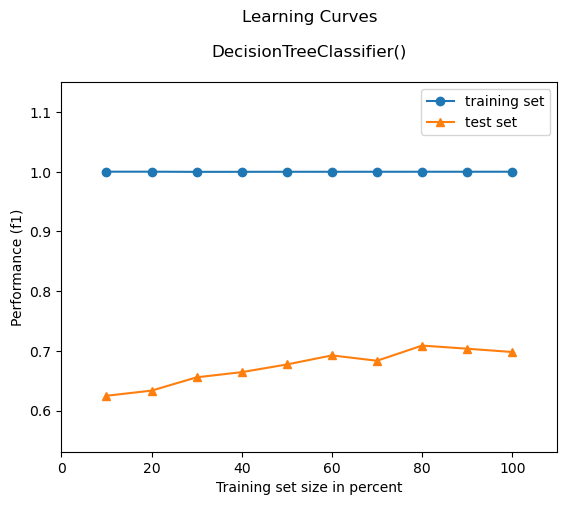

In [134]:
plot_learning_curves(X_train, y_train, X_test, y_test,DT,scoring="f1")#plotting learning curves
plt.show()

### SVM

In [135]:
from sklearn.svm import SVC #importing SVM

In [136]:
svc_model =SVC(C=.1,kernel='linear',verbose=1,class_weight="balanced").fit(X_train, y_train)#building model

[LibSVM]

In [137]:
y_train_Pred = svc_model.predict(X_train)
y_test_Pred = svc_model.predict(X_test)#get predictions

In [138]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}")#confusion matrix of train dfs

========Train=======
Confusion Matrix 
[[14090  2750]
 [ 1580  4648]]


In [139]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}")#confusion matrix of test dfs

========Test=======
Confusion Matrix 
[[3499  712]
 [ 361 1196]]


In [140]:
Metrics = get_metrics(y_train,y_train_Pred,y_test,y_test_Pred,"SVM",Metrics)
Metrics#updating metrics

Model  F1_Train   F1_Test
0       Logistic  0.621404  0.622328
1    Logistic_wo  0.577781  0.577908
2         Scaled  0.840109  0.850267
3   Logistic_VIF  0.840837  0.837401
4             l1  0.840823  0.838196
5             l2  0.840877  0.837401
6     elasticnet  0.840787  0.837443
7    Naive Bayes   0.71403  0.705096
8            KNN  0.944004  0.929971
9   DecisionTree  0.999957  0.837796
10           SVM  0.816975  0.819351

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

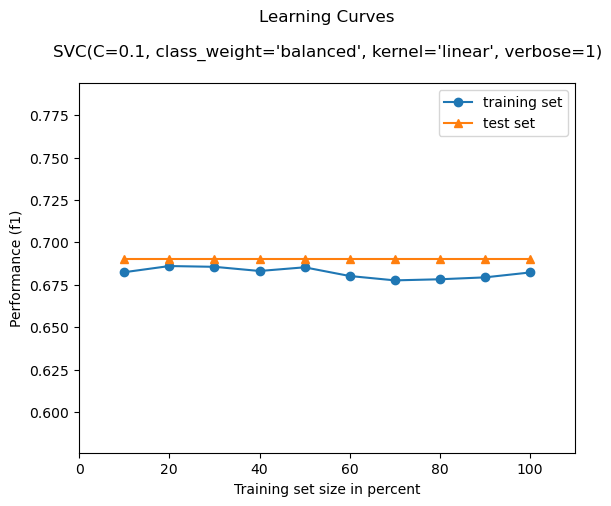

In [141]:
plot_learning_curves(X_train, y_train, X_test, y_test,svc_model,scoring="f1")
plt.show()#plotting Learning curves

### RandomForest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier #import RF 

In [143]:
RF = RandomForestClassifier(n_estimators = 300, random_state = 0).fit(X_train,y_train)#fit model with train dfs
y_train_Pred = RF.predict(X_train)
y_test_Pred = RF.predict(X_test) #getting predictions

In [144]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}")#confusion matrix of train dfs

========Train=======
Confusion Matrix 
[[16840     0]
 [    1  6227]]


In [145]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}")#confusuon matrix of test dfs

========Test=======
Confusion Matrix 
[[4103  108]
 [ 341 1216]]


In [146]:
Metrics=get_metrics(y_train,y_train_Pred,y_test,y_test_Pred,"RFClassifier",Metrics)
Metrics#updating metrics df

Model  F1_Train   F1_Test
0       Logistic  0.621404  0.622328
1    Logistic_wo  0.577781  0.577908
2         Scaled  0.840109  0.850267
3   Logistic_VIF  0.840837  0.837401
4             l1  0.840823  0.838196
5             l2  0.840877  0.837401
6     elasticnet  0.840787  0.837443
7    Naive Bayes   0.71403  0.705096
8            KNN  0.944004  0.929971
9   DecisionTree  0.999957  0.837796
10           SVM  0.816975  0.819351
11  RFClassifier  0.999957  0.920057

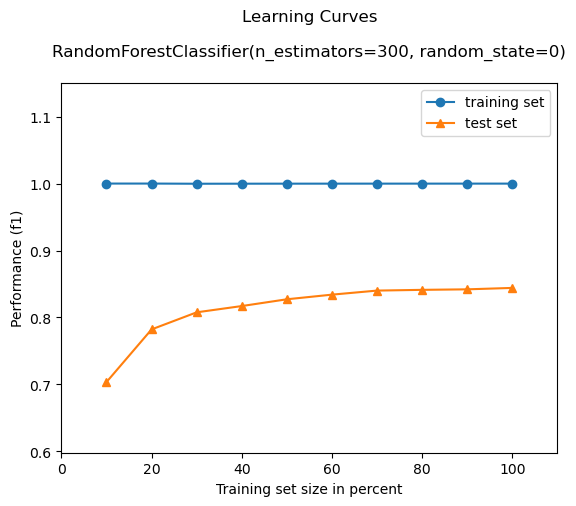

In [147]:
plot_learning_curves(X_train, y_train, X_test, y_test,RF,scoring="f1") #plotting learning curves
plt.show()

### XG Boost

In [148]:
import xgboost as xgb #importing XGBoost

In [149]:
XGB = xgb.XGBClassifier(n_estimators=500).fit(X_train, y_train)#fit model with train dfs
y_train_Pred = XGB.predict(X_train)#gettting predictions
y_test_Pred = XGB.predict(X_test)

In [150]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}") #confusion matrix of trained dfs

========Train=======
Confusion Matrix 
[[16831     9]
 [   30  6198]]


In [151]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}") #confusion matrix of test dfs

========Test=======
Confusion Matrix 
[[4057  154]
 [ 301 1256]]


In [152]:
Metrics=get_metrics(y_train,y_train_Pred,y_test,y_test_Pred,"XGBoost",Metrics)
Metrics #updating metrics DF

Model  F1_Train   F1_Test
0       Logistic  0.621404  0.622328
1    Logistic_wo  0.577781  0.577908
2         Scaled  0.840109  0.850267
3   Logistic_VIF  0.840837  0.837401
4             l1  0.840823  0.838196
5             l2  0.840877  0.837401
6     elasticnet  0.840787  0.837443
7    Naive Bayes   0.71403  0.705096
8            KNN  0.944004  0.929971
9   DecisionTree  0.999957  0.837796
10           SVM  0.816975  0.819351
11  RFClassifier  0.999957  0.920057
12       XGBoost  0.998308  0.919839

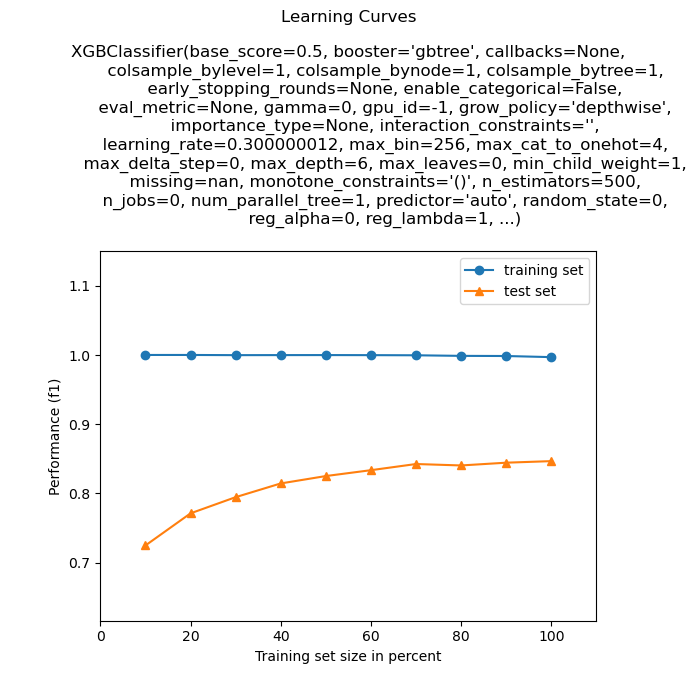

In [153]:
plot_learning_curves(X_train, y_train, X_test, y_test,XGB,scoring="f1")
plt.show() #plotting learning curve

### Deep Learning Model

In [154]:
import tensorflow as tf #importing required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, BatchNormalization,Flatten
import keras.backend as K
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam, RMSprop,SGD

In [155]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = K.round((K.mean(2*(precision*recall)/(precision+recall+K.epsilon()))))
    return f1_val

In [156]:
model5=Sequential() #defining a neural netork model
model5.add(Dense(300,activation='relu',input_dim=X_train.shape[1]))
model5.add(Dense(150,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(75,activation='relu'))
model5.add(Dropout(0.2))
model5.add(BatchNormalization())
model5.add(Dense(50,activation='relu'))
model5.add(Dropout(0.2))
model5.add(BatchNormalization())
model5.add(Dense(1,activation='sigmoid'))
model5.compile(optimizer="adam",loss='binary_crossentropy',metrics=[get_f1])

In [157]:
model5.fit(X_train, y_train, epochs=10, batch_size=32) #fit model with train dfs

Epoch 1/10
721/721 [==============================] - 9s 7ms/step - loss: 0.4885 - get_f1: 0.6657
Epoch 2/10
721/721 [==============================] - 5s 7ms/step - loss: 0.3544 - get_f1: 0.9376
Epoch 3/10
721/721 [==============================] - 5s 7ms/step - loss: 0.2897 - get_f1: 0.9875
Epoch 4/10
721/721 [==============================] - 5s 7ms/step - loss: 0.2529 - get_f1: 0.9875
Epoch 5/10
721/721 [==============================] - 5s 7ms/step - loss: 0.2287 - get_f1: 0.9931
Epoch 6/10
721/721 [==============================] - 5s 7ms/step - loss: 0.2105 - get_f1: 0.9945
Epoch 7/10
721/721 [==============================] - 5s 7ms/step - loss: 0.1976 - get_f1: 0.9945
Epoch 8/10
721/721 [==============================] - 5s 7ms/step - loss: 0.1797 - get_f1: 0.9958
Epoch 9/10
721/721 [==============================] - 5s 7ms/step - loss: 0.1638 - get_f1: 0.9972
Epoch 10/10
721/721 [==============================] - 5s 7ms/step - loss: 0.1437 - get_f1: 0.9958


In [158]:
y_train_Pred = np.round(model5.predict(X_train).flatten()) #Getting predictions
y_test_Pred = np.round(model5.predict(X_test).flatten()) 

181/181 [==============================] - 1s 3ms/step


In [159]:
print('========Train=======')
print(f"Confusion Matrix \n{confusion_matrix(y_train, y_train_Pred)}") #confusion matrix of train

========Train=======
Confusion Matrix 
[[16725   115]
 [  630  5598]]


In [160]:
print('========Test=======')
print(f"Confusion Matrix \n{confusion_matrix(y_test, y_test_Pred)}") #confusion matrix of test

========Test=======
Confusion Matrix 
[[4027  184]
 [ 373 1184]]


In [161]:
Metrics=get_metrics(y_train,y_train_Pred,y_test,y_test_Pred,"DeepLearning",Metrics)
Metrics #Getting metrics updated into the metrics dataframe

Model  F1_Train   F1_Test
0       Logistic  0.621404  0.622328
1    Logistic_wo  0.577781  0.577908
2         Scaled  0.840109  0.850267
3   Logistic_VIF  0.840837  0.837401
4             l1  0.840823  0.838196
5             l2  0.840877  0.837401
6     elasticnet  0.840787  0.837443
7    Naive Bayes   0.71403  0.705096
8            KNN  0.944004  0.929971
9   DecisionTree  0.999957  0.837796
10           SVM  0.816975  0.819351
11  RFClassifier  0.999957  0.920057
12       XGBoost  0.998308  0.919839
13  DeepLearning  0.967251  0.901373

### Test Claim data

In [162]:
Claim_test=pd.read_csv(r"TestData\TestData\Test_Claim.csv",na_values=('?',"MISSINGVALUE","MISSEDDATA",-5))
Claim_test.shape

(8912, 19)

### Test  Demographics

In [163]:
Demographics_test=pd.read_csv(r"TestData\TestData\Test_Demographics.csv",na_values=("NA"))
Demographics_test.shape

(8912, 10)

### Test  Policy Data

In [164]:
Policy_test=pd.read_csv(r"TestData\TestData\Test_Policy.csv",na_values=("-1","NA","MISSINGVAL"))
Policy_test.shape

(8912, 10)

### Test Vehicle Data

In [165]:
Vehicle_test=pd.read_csv(r"TestData\TestData\Test_Vehicle.csv",na_values=('???'))
Vehicle_test.shape

(35648, 3)

In [166]:
Vehicles_test= pd.DataFrame(set(Vehicle_test.CustomerID))
Vehicles_test.columns=["CustomerID"]
for channel in Vehicle_test.VehicleAttribute.unique():
    temp= Vehicle_test[Vehicle_test["VehicleAttribute"] == channel][['CustomerID','VehicleAttributeDetails']]
    temp.columns = ['CustomerID',channel]
    Vehicles_test=pd.merge(Vehicles_test,temp)

Vehicles_test.shape

(8912, 5)

### Merging all Test DF's into One Test DF

In [167]:
dfs_test=[Claim_test,Vehicles_test,Demographics_test,Policy_test]
Data_test=pd.DataFrame(set(Vehicles_test.CustomerID))
Data_test.columns=["CustomerID"]

In [168]:
for i in dfs_test:
    Data_test=pd.merge(Data_test,i)

In [169]:
Data_test.shape

(8912, 41)

### PreProcessing Test Data

In [170]:
unimportant=vif_cols+unique_var #adding unimportant variable lists

In [171]:
Data_test.drop(unimportant,axis=1,inplace=True) #dropping unimportant varuables

In [172]:
cat_attr=Data_test.select_dtypes(include ='object').columns #seperating numerical and categorical attributes
num_attr=Data_test.select_dtypes(include =['int64','float64']).columns 

In [173]:
for i in cat_attr:  #imputing null values
    Data_test[i]=Data_test[i].fillna(Data_test[i].mode()[0])
for i in num_attr: 
    Data_test[i]=Data_test[i].fillna(Data_test[i].mean())

In [174]:
Data_test=pd.get_dummies(Data_test,drop_first=True) #dummification

In [175]:
Data_test[num_attr]=scaler.transform(Data_test[num_attr]) #scaling numeric variables

In [176]:
Data_test

IncidentTime  NumberOfVehicles  BodilyInjuries  Witnesses  CapitalGains  \
0         0.826087          0.000000             1.0   0.333333     21.533333   
1         0.173913          0.666667             1.0   0.333333     -0.333333   
2         0.652174          0.000000             1.0   0.000000     35.200000   
3         0.826087          0.666667             0.0   0.333333     -0.333333   
4         0.347826          0.000000             0.0   0.333333     -0.333333   
...            ...               ...             ...        ...           ...   
8907      0.739130          0.000000             0.5   1.000000     -0.333333   
8908      0.304348          0.000000             0.0   0.666667     -0.333333   
8909      0.608696          0.666667             0.5   0.666667     -0.333333   
8910      0.913043          0.666667             0.0   0.000000     -0.333333   
8911      0.782609          0.666667             1.0   0.333333     25.866667   

      CapitalLoss  Policy_Deductible  UmbrellaLimit  \
0        0.085880           0.004975      46.004500   
1        0.087153           0.008398       1.000000   
2        0.086007           0.010617      53.790891   
3        0.090482           0.009950       1.000000   
4        0.090482           0.005711       1.000000   
...           ...                ...            ...   
8907     0.085407           0.009851       1.000000   
8908     0.090482           0.009950       1.000000   
8909     0.086362           0.009950       1.000000   
8910     0.090482           0.019900       1.000000   
8911     0.090482           0.019900       1.000000   

      TypeOfIncident_Parked Car  TypeOfIncident_Single Vehicle Collision  ...  \
0                             0                                        1  ...   
1                             0                                        0  ...   
2                             0                                        1  ...   
3                             0                                        0  ...   
4                             0                                        1  ...   
...                         ...                                      ...  ...   
8907                          1                                        0  ...   
8908                          1                                        0  ...   
8909                          0                                        0  ...   
8910                          0                                        0  ...   
8911                          0                                        0  ...   

      InsuredHobbies_reading  InsuredHobbies_skydiving  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          1                         0   
...                      ...                       ...   
8907                       0                         0   
8908                       0                         0   
8909                       0                         0   
8910                       0                         0   
8911                       0                         0   

      InsuredHobbies_sleeping  InsuredHobbies_video-games  \
0                           0                           0   
1                           1                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
8907                        0                           0   
8908                        0                           0   
8909                        0                           0   
8910                        0                           0   
8911                        0  

In [177]:
(Data_test.columns).symmetric_difference(X_train.columns) #finfing difference between columns of trained dataset and test data set

Index([], dtype='object')

In [178]:
Predictions=pd.read_csv(r"TestData\TestData\Test.csv") #read test csv

In [179]:
predict=np.round(knn.predict(Data_test).flatten())  #getting opredictions from KNN model built

In [180]:
Predictions["ReportedFraud"]=list(predict) #updating predictions with predictions

In [181]:
Predictions["ReportedFraud"].value_counts() #looking at value counts

0    7490
1    1422
Name: ReportedFraud, dtype: int64

In [182]:
Predictions.to_csv("Predictions_DeepLearning.csv",index=False) #converting predictions to csv

In [183]:
pd.read_csv("Predictions_KNN.csv") #looking at FinalDF

CustomerID  ReportedFraud
0     Cust10008              0
1     Cust10010              0
2     Cust10015              0
3     Cust10020              0
4      Cust1003              1
...         ...            ...
8907  Cust37942              0
8908  Cust20528              0
8909  Cust36797              0
8910  Cust28499              0
8911  Cust21356              0

[8912 rows x 2 columns]